# AIM: Read the data sets collected from GPS reciever and filter it

## IMPORTS


In [121]:
import pandas as pd
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 21)

import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
colnm = ['code','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'] 
df = pd.read_csv("openField1.txt" ,names=colnm ,  header=None )
df

,code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,$GPGSV,3,1,11,02,41,255,40.0,04,14,074,29,05,35,299,38.0,06,25.0,201,41.0,1*63
1,$GPGSV,3,2,11,07,63,136,39.0,09,52,074,34,16,15,039,33.0,29,8.0,320,37.0,1*6C
2,$GPGSV,3,3,11,30,43,181,44.0,13,05,251,NaN,26,00,000,NaN,1*5D,NaN,NaN,NaN,NaN
3,$GLGSV,3,1,10,78,41,136,NaN,77,43,054,NaN,76,06,016,NaN,79,3.0,172,NaN,1*7A
4,$GLGSV,3,2,10,69,31,293,NaN,84,33,286,NaN,83,12,227,NaN,85,14.0,345,NaN,1*78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18688,$GNGSA,A,3,02,07,12,19,27.0,30,33,NaN,NaN,NaN,NaN,NaN,0.8,0.4,0.6,3*31,NaN,NaN
18689,$GNGSA,A,3,07,10,23,24,25.0,29,30,32,33,NaN,NaN,NaN,0.8,0.4,0.6,4*31,NaN,NaN
18690,$GNVTG,NaN,T,NaN,M,0.0,N,0.0,K,A*3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18691,$GNRMC,122531.00,A,5159.367185,N,00422.977396,E,0.0,NaN,191120,1.8,W,A,V*6F,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## $GPGSV dataset
### GPS Satellites in view

```
eg. $GPGSV,3,1,11,03,03,111,00,04,15,270,00,06,01,010,00,13,06,292,00*74
    $GPGSV,3,2,11,14,25,170,00,16,57,208,39,18,67,296,40,19,40,246,00*74
    $GPGSV,3,3,11,22,42,067,42,24,14,311,43,27,05,244,00,,,,*4D


    $GPGSV,1,1,13,02,02,213,,03,-3,000,,11,00,121,,14,13,172,05*67

1    = Total number of messages of this type in this cycle
2    = Message number
3    = Total number of SVs in view
4    = SV PRN number
5    = Elevation in degrees, 90 maximum
6    = Azimuth, degrees from true north, 000 to 359
7    = SNR, 00-99 dB (null when not tracking)
8-11 = Information about second SV, same as field 4-7
12-15= Information about third SV, same as field 4-7
16-19= Information about fourth SV, same as field 4-7
```


In [37]:
gsv = df[ df['code'] == '$GPGSV']
gsv

,code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,$GPGSV,3,1,11,02,41,255,40.0,04,14,074,29,05,35,299,38.0,06,25.0,201,41.0,1*63
1,$GPGSV,3,2,11,07,63,136,39.0,09,52,074,34,16,15,039,33.0,29,8.0,320,37.0,1*6C
2,$GPGSV,3,3,11,30,43,181,44.0,13,05,251,NaN,26,00,000,NaN,1*5D,NaN,NaN,NaN,NaN
20,$GPGSV,3,1,11,02,41,255,40.0,04,14,074,29,05,35,299,36.0,06,25.0,201,42.0,1*6E
21,$GPGSV,3,2,11,07,63,136,38.0,09,52,074,32,16,15,039,32.0,29,8.0,320,36.0,1*6B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18652,$GPGSV,3,2,10,07,66,123,32.0,09,46,077,39,13,10,254,38.0,16,14.0,033,35.0,1*6C
18653,$GPGSV,3,3,10,29,07,316,35.0,30,49,180,44,1*6C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18672,$GPGSV,3,1,10,02,37,248,31.0,04,09,077,36,05,41,298,41.0,06,19.0,198,40.0,1*69
18673,$GPGSV,3,2,10,07,66,123,31.0,09,46,077,39,13,10,254,40.0,16,14.0,033,35.0,1*60


## $GPGSA datasets

### GPS DOP and active satellites

```
eg1. $GPGSA,A,3,,,,,,16,18,,22,24,,,3.6,2.1,2.2*3C
eg2. $GPGSA,A,3,19,28,14,18,27,22,31,39,,,,,1.7,1.0,1.3*35


1    = Mode:
       M=Manual, forced to operate in 2D or 3D
       A=Automatic, 3D/2D
2    = Mode:
       1=Fix not available
       2=2D
       3=3D
3-14 = IDs of SVs used in position fix (null for unused fields)
15   = PDOP
16   = HDOP
17   = VDOP
```

In [88]:
gsa = df[ (df['code']=='$GNGSA') & (df['3'] < '64' )]
# SV ID < 64 => a NAVSTAR satellite
gsa=gsa[['code','1','15','16','17','18']]
gsa.columns = ['code','mode','PDOP','HDOP','VDOP','18']
gsa


,code,mode,PDOP,HDOP,VDOP,18
13,$GNGSA,A,0.7,0.4,0.6,1*31
15,$GNGSA,A,0.7,0.4,0.6,3*3A
16,$GNGSA,A,0.7,0.4,0.6,4*3F
33,$GNGSA,A,0.7,0.4,0.6,1*31
35,$GNGSA,A,0.7,0.4,0.6,3*3A
...,...,...,...,...,...,...
18667,$GNGSA,A,0.8,0.4,0.6,3*31
18668,$GNGSA,A,0.8,0.4,0.6,4*31
18686,$GNGSA,A,0.8,0.4,0.6,1*3D
18688,$GNGSA,A,0.8,0.4,0.6,3*31


count    2766.000000
mean        0.776573
std         0.042362
min         0.700000
25%         0.800000
50%         0.800000
75%         0.800000
max         0.800000
Name: PDOP, dtype: float64
count    2766.000000
mean        0.602603
std         0.015925
min         0.600000
25%         0.600000
50%         0.600000
75%         0.600000
max         0.700000
Name: VDOP, dtype: float64
count     2766
unique       1
top        0.4
freq      2766
Name: HDOP, dtype: object


[]

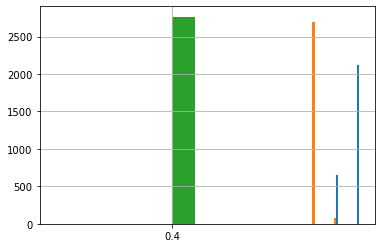

In [128]:
print(gsa.PDOP.describe())
print(gsa.VDOP.describe())
print(gsa.HDOP.describe())

gsa.PDOP.hist()
plt.plot()
gsa.VDOP.hist()
plt.plot()
gsa.HDOP.hist()
plt.plot()

# $GPRMC
## Recommended minimum specific GPS/Transit data

```
eg1. $GPRMC,081836,A,3751.65,S,14507.36,E,000.0,360.0,130998,011.3,E*62
eg2. $GPRMC,225446,A,4916.45,N,12311.12,W,000.5,054.7,191194,020.3,E*68


           225446       Time of fix 22:54:46 UTC
           A            Navigation receiver warning A = OK, V = warning
           4916.45,N    Latitude 49 deg. 16.45 min North
           12311.12,W   Longitude 123 deg. 11.12 min West
           000.5        Speed over ground, Knots
           054.7        Course Made Good, True
           191194       Date of fix  19 November 1994
           020.3,E      Magnetic variation 20.3 deg East
           *68          mandatory checksum
```           

In [116]:
rmc = df[(df['code']=="$GNRMC") & (df['8'] is not None)]
rmc = rmc[['code','1','9','3','4','5','6','10','11']]
rmc.columns = ['code','tome_fix','date_fix','lat','lat_dir','long','long_dir','magnetic_variation','mag_dir']
rmc

,code,tome_fix,date_fix,lat,lat_dir,long,long_dir,magnetic_variation,mag_dir
18,$GNRMC,121010.08,191120,5159.367959,N,00422.977007,E,1.8,W
38,$GNRMC,121011.00,191120,5159.367997,N,00422.977110,E,1.8,W
58,$GNRMC,121012.00,191120,5159.368064,N,00422.977182,E,1.8,W
78,$GNRMC,121013.00,191120,5159.368077,N,00422.977378,E,1.8,W
98,$GNRMC,121014.00,191120,5159.367870,N,00422.977444,E,1.8,W
...,...,...,...,...,...,...,...,...,...
18607,$GNRMC,122527.00,191120,5159.367185,N,00422.977395,E,1.8,W
18628,$GNRMC,122528.00,191120,5159.367184,N,00422.977395,E,1.8,W
18649,$GNRMC,122529.00,191120,5159.367185,N,00422.977395,E,1.8,W
18670,$GNRMC,122530.00,191120,5159.367185,N,00422.977395,E,1.8,W


<AxesSubplot:xlabel='long', ylabel='lat'>

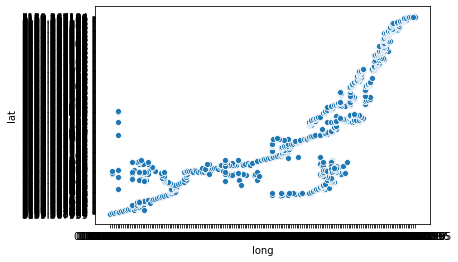

In [129]:
# rmc.plot(kind='scatter')
plt.figure(figsize=(15,14))
sns.scatterplot(rmc.long, rmc.lat)
